# Generate Data to Perform PCA

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(33)

mu_vect1 = np.array([0,0,0])
matrix1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vect1,matrix1,30)


df = pd.DataFrame(class1_sample,columns = ['feature1', 'feature2', 'feature3'] )
df['target'] = 0


mu_vect2  = np.array([1,1,1])
matrix2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vect2,matrix2,30)
df1 = pd.DataFrame(class2_sample,columns = ['feature1','feature2','feature3'])
df1['target'] = 1


df = df.append(df1, ignore_index = True)

df = df.sample(40)

X: n × p numeric matrix (rows: cases/samples, columns: variables/factors); without any missing values.

In [2]:
df.head()

,feature1,feature2,feature3,target
7,0.690081,-2.045853,0.334467,0
12,-0.777376,-0.414635,-1.145641,0
48,0.181486,-0.850421,1.397142,1
52,1.346235,0.550378,-0.355818,1
15,0.455504,-0.837645,-0.146961,0


# Plot the 4-D Data Using Plotly

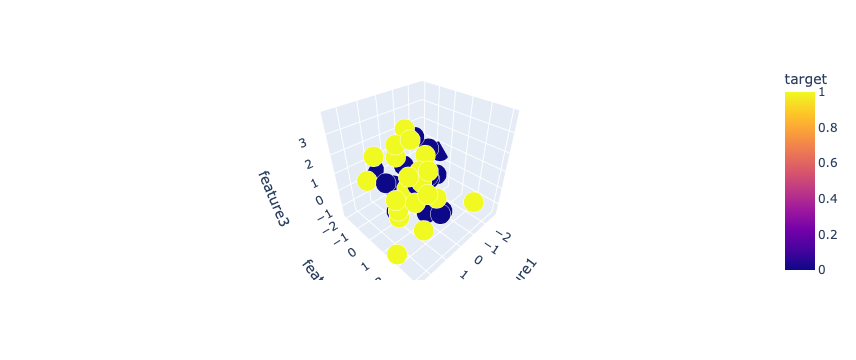

In [3]:
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected = True)

fig = px.scatter_3d(df, x = df['feature1'],y =df['feature2'], z= df['feature3'],color =df['target'])
fig.update_traces (marker = dict (size = 12,line =dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()


# Scaling the Data Using Standard Scaler 

#### y = (x – mean) / standard_deviation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
df.iloc[:,0:3] = scaling.fit_transform(df.iloc[:,0:3])


# Covariance Matrix of the Data

In [12]:
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix: ',covariance_matrix)



Covariance Matrix:  [[1.02564103 0.30430446 0.11613081]
 [0.30430446 1.02564103 0.05547128]
 [0.11613081 0.05547128 1.02564103]]


# Eigen Values and Eigen Vector of Covariance Matrix

In [6]:
eigen_values , eigen_vectors = np.linalg.eig(covariance_matrix)

In [7]:
#Displaying Eigen Values

print(eigen_values)

array([1.37271566, 0.71492123, 0.98928619])

In [8]:
# Displaying Eigen Vectors

print(eigen_vectors)

array([[ 0.68220693,  0.71965786, -0.12917535],
       [ 0.65125664, -0.67840285, -0.34005054],
       [ 0.33235297, -0.14785853,  0.93149308]])

# Eigen Vector with highest eigen values are selected as Principal Components 

In [9]:
pc = eigen_vectors[0:2]
print(pc)
     

array([[ 0.68220693,  0.71965786, -0.12917535],
       [ 0.65125664, -0.67840285, -0.34005054]])

# Transforming the original data using uT.x

In [10]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-1.088650,1.637079,0
1,-0.843148,0.331413,0
2,-0.804018,0.396413,1
3,0.884664,0.772122,1
4,-0.470895,0.976253,0


# Visualization of the Data after Dimensionality Reduction generated by PCA 

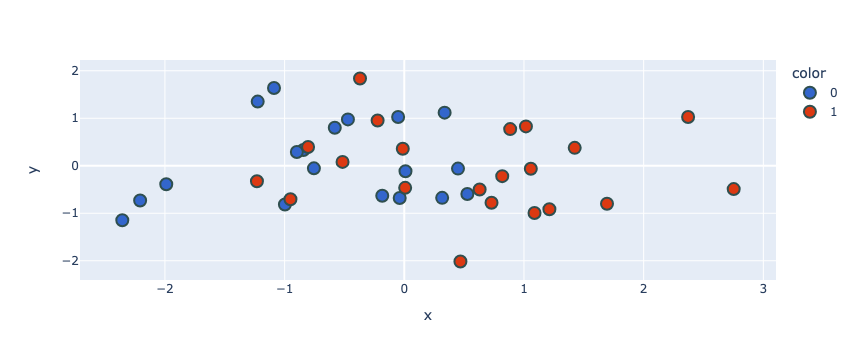

In [11]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()